<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Student name: <span style="color:blue"><b>Sashank Silwal</b></span><br/>
Grade: <span style="color:red"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 7</span>
# <span style="color:green">The Graph of Sententially Co-Occurrent Names in Text Data

1. <span style="color:blue"><b>Below, replace "/Users/mb7881/WorkPlaces/Python Projects 2/2 NYUAD Networks/CourseNotebooks/Homework 6" by the position of the folder of this notebook in your computer, inside which you should also include a text file of a book or novel.

2. <span style="color:blue"><b>Dowload the txt file of a book (with Chapters) from http://www.gutenberg.org/ and after you remove the preamble (your text should start from the first chapter) and the end disclaimers (your text should end at the end of the book) place it in cell 2 under an appropriate name.

3. <span style="color:blue"><b>Subsequently run all cells and interpret the network plot of the last cell (remember that edge colors correspond to sentiment scores).

In [1]:
import pandas as pd
import numpy as np
import urllib2 
import re, string, math, random, operator
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag
from textblob import TextBlob
import codecs
import os
os.chdir("/Users/sashanksilwal/Desktop/Freshman /Networks/Homework 7")
from collections import Counter
import itertools as it
import networkx as nx
from networkx.algorithms import bipartite
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
filename = 'oliver twist.txt' # Insert in quotes the name of your txt file, e.g. "PeterPan.txt"
titlename = "Oliver Twist"   # Insert in quotes the name of the novel (or book), e.g., "Peter Pan"

f = codecs.open(filename, "r", encoding="utf-8").readlines()

num_lines = 0
num_words = 0
num_chars = 0
for line in f:
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
print "%s has number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars)

Oliver Twist has number of words = 157187 (and number of characters/symbols = 910820)


In [3]:
text=", ".join(f).encode('ascii','ignore').replace('\n',' ')
print len(text), type(text)
text

948190 <type 'str'>


'CHAPTER I\r , \r , TREATS OF THE PLACE WHERE OLIVER TWIST WAS BORN AND OF THE\r , CIRCUMSTANCES ATTENDING HIS BIRTH\r , \r , Among other public buildings in a certain town, which for many reasons\r , it will be prudent to refrain from mentioning, and to which I will\r , assign no fictitious name, there is one anciently common to most towns,\r , great or small: to wit, a workhouse; and in this workhouse was born; on\r , a day and date which I need not trouble myself to repeat, inasmuch as\r , it can be of no possible consequence to the reader, in this stage of\r , the business at all events; the item of mortality whose name is\r , prefixed to the head of this chapter.\r , \r , For a long time after it was ushered into this world of sorrow and\r , trouble, by the parish surgeon, it remained a matter of considerable\r , doubt whether the child would survive to bear any name at all; in which\r , case it is somewhat more than probable that these memoirs would never\r , have appeared; or, i

### Extraction of Names

<span style="color:blue"><b>First, get a list of possible names:

In [5]:
blob = TextBlob(text)
textSentences = blob.sentences
# names=[]
# for sentence in textSentences:
#     sent = sentence.tags
#     for i in sent:
#         if i[1]=='NNP': # and i[1].lower != 'VBD' and i[1].lower != 'VB' and i[1].lower != 'VBG' and i[1].lower != 'VBP' and i[1].lower != 'VB':
#             if len(i[0])>1:
#                 names.append(i[0].replace(".",""))
# names=sorted(set(names))
# names=[n for n in names if "_" not in n]
# print len(names)
# names

<span style="color:blue"><b>Next, select only humans' names from the above list. Check into the text whether the previous names exist as 2-grams (first-last name) and add that form then. You may also want to check a Wikipedia page or any other page which would have a list of the novel's characters.

In [6]:
Names=[u'Fagin',u'Nancy',u'Rose Maylie',u'Artful Dodger',
       u'Mr. Bumble',u'Monks',u'Bill Sikes',u'Mr. Brownlow',
       u'Noah Claypole',u'Oliver Twist',u'Mr. Sowerberry',
       u'Charley Bates',u'Toby Crackit',u'Tom Chitling',u"Bull's-eye",
       u'Mrs. Bedwin',u'Mrs. Corney',u'MR. GRIMWIG',u'Mrs. Mann',u'Mrs. Sowerberry']
Names=sorted(Names)
print len(Names)
Names

20


[u'Artful Dodger',
 u'Bill Sikes',
 u"Bull's-eye",
 u'Charley Bates',
 u'Fagin',
 u'MR. GRIMWIG',
 u'Monks',
 u'Mr. Brownlow',
 u'Mr. Bumble',
 u'Mr. Sowerberry',
 u'Mrs. Bedwin',
 u'Mrs. Corney',
 u'Mrs. Mann',
 u'Mrs. Sowerberry',
 u'Nancy',
 u'Noah Claypole',
 u'Oliver Twist',
 u'Rose Maylie',
 u'Toby Crackit',
 u'Tom Chitling']

## Co-Occurrences of Names in Sentences

In [7]:
sendic=dict()
for i,v in enumerate(textSentences):
    sent=v.sentiment.polarity
    wl=[]
    for term in Names:
        if term in v: 
            wl.append(term)
    if len(wl)>1:
        sendic[i]=wl 
sendic

{64: [u'Mr. Bumble', u'Mrs. Mann'],
 76: [u'Mr. Bumble', u'Mrs. Mann'],
 100: [u'Mr. Bumble', u'Mrs. Mann'],
 406: [u'Mr. Bumble', u'Mr. Sowerberry'],
 412: [u'Mr. Bumble', u'Mr. Sowerberry'],
 429: [u'Mr. Bumble', u'Mr. Sowerberry'],
 613: [u'Mr. Sowerberry', u'Mrs. Sowerberry'],
 628: [u'Mr. Sowerberry', u'Mrs. Sowerberry'],
 778: [u'Noah Claypole', u'Oliver Twist'],
 779: [u'Mr. Sowerberry', u'Mrs. Sowerberry'],
 781: [u'Noah Claypole', u'Oliver Twist'],
 928: [u'Mr. Bumble', u'Mrs. Sowerberry'],
 942: [u'Mr. Bumble', u'Mrs. Sowerberry'],
 1161: [u'Fagin', u'Oliver Twist'],
 1279: [u'Charley Bates', u'Fagin'],
 1840: [u'Charley Bates', u'Fagin'],
 1904: [u'Charley Bates', u'Fagin'],
 1917: [u'Fagin', u'Nancy'],
 1924: [u'Fagin', u'Nancy'],
 2001: [u'MR. GRIMWIG', u'Mr. Brownlow', u'Mrs. Bedwin'],
 2030: [u'Mrs. Bedwin', u'Oliver Twist'],
 2130: [u'Mr. Brownlow', u'Mrs. Bedwin'],
 2145: [u'Mr. Brownlow', u'Oliver Twist'],
 2183: [u'Mr. Brownlow', u'Mrs. Bedwin'],
 2307: [u'Fagin', u'

## Co-Occurrences of Names in Sentences

In [8]:
medges=[]
for k,v in sendic.items():
    sent=textSentences[k].sentiment.polarity
    dd={}
    ps=set()
    for j in it.combinations(v, 2):
        ps.add(j)
        dd[j]=(k,sent)
    for jj in ps:
        s=0
        ss=0
        for kk,vv in dd.items():
            if kk==jj:
                s+=1
                ss+=vv[1]
        medges.append((jj[0],jj[1],"Sentence_"+str(k),ss/float(s)))
print len(medges) 
S=len(medges)
# medges

84


In [9]:
medgesd=[]
for e in medges:
    d={}
    d['Sentence']=e[2]
    d['Average sentiment']=e[3]
    medgesd.append((e[0],e[1],d))
# for e in medgesd:
#     print e

In [10]:
G = nx.MultiGraph()
G.add_edges_from(medgesd)
for e in G.edges(data=True):
    if e[0]==e[1]:
        G.remove_edge(e[0],e[1])
print "Nodes =",len(G.nodes())
print "Multiedges =",len(G.edges())
# for e in G.edges(data=True):
#     print e

Nodes = 18
Multiedges = 84


In [11]:
df = nx.to_pandas_edgelist(G) 
# df
df.rename(columns={'source':'First Name','target':'Second Name'}, inplace=True)
df=df[['First Name','Second Name','Average sentiment','Sentence']]
df.head()

,First Name,Second Name,Average sentiment,Sentence
0,Mrs. Mann,Mr. Bumble,0.480000,Sentence_2707
1,Mrs. Mann,Mr. Bumble,-0.187500,Sentence_2721
2,Mrs. Mann,Mr. Bumble,-0.600000,Sentence_2697
3,Mrs. Mann,Mr. Bumble,0.079167,Sentence_64
4,Mrs. Mann,Mr. Bumble,0.250000,Sentence_76


In [12]:
weight={(x,y):v['Average sentiment'] for x,y,v in G.edges(data=True)}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)
N=len(Gw.nodes())

In [13]:
print "Graph Gw is a weighted graph with %i nodes and %i edges" %(len(Gw.nodes()),len(Gw.edges()))
print "The density of Gw is %.3f" %nx.density(Gw)
if nx.is_connected(Gw)==True:
    print "Gw is a connected graph"
else:
    print "Gw is a disconnected graph and it has",nx.number_connected_components(Gw),"connected components"    
giant = max(nx.connected_component_subgraphs(Gw), key=len)
Gwlcc=Gw.subgraph(giant)
print "The largest connected component of Gw is a weighted graph with %i nodes and %i edges" %(len(Gwlcc.nodes()),len(Gwlcc.edges()))
print "The density of the largest connected component of Gw is %.3f" %nx.density(Gwlcc)

lccmedges=[]
for e in medges:
    if e[0] in giant and e[1] in giant:
        lccmedges.append((e[0],e[1]))
NN=len(Gwlcc.nodes())
SS=len(lccmedges)

Graph Gw is a weighted graph with 18 nodes and 31 edges
The density of Gw is 0.203
Gw is a connected graph
The largest connected component of Gw is a weighted graph with 18 nodes and 31 edges
The density of the largest connected component of Gw is 0.203


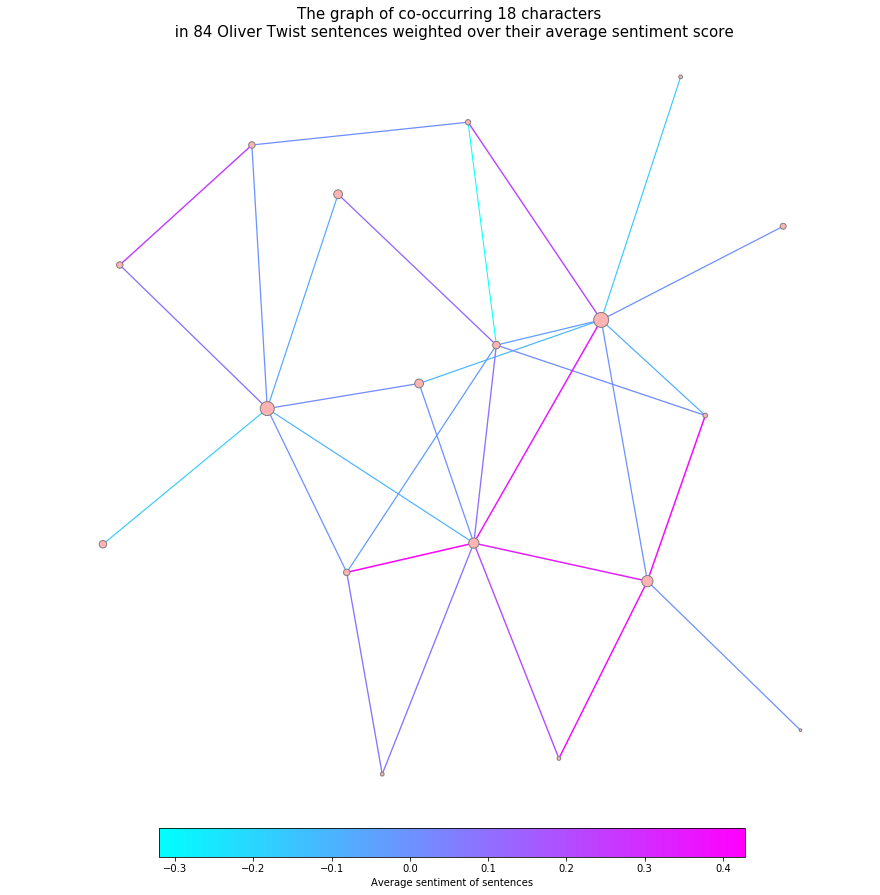

In [14]:
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
# elabels = nx.get_edge_attributes(Gw,'weight')
edge_width1=[10*(0.1+w) for w in edge_width] 
# print edge_width

figsize=(15,17)

cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gw.edges(data=True) ]
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list

pos=graphviz_layout(Gw) 
node_color="#ffb3b3"
node_border_color="grey"
# edge_color="#668cff"

d = Gw.degree()
node_size=[7*v[1] for v in list(nx.degree(G))]

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos,node_color=node_color,node_size=node_size)
nodes.set_edgecolor(node_border_color)
# nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width,a=1)
nx.draw_networkx_edges(Gw, pos,width=width_list,edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=1)
labels_no={}
for n in G.nodes():
    labels_no[n]=''
nx.draw_networkx_labels(G, pos,labels=labels_no)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
# yoffset = {}
# y_off = -15   # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(Gw, yoffset,font_size=8);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The graph of co-occurring %i characters \n in %i %s sentences weighted over their average sentiment score" %(N,S,titlename) 
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.05) 

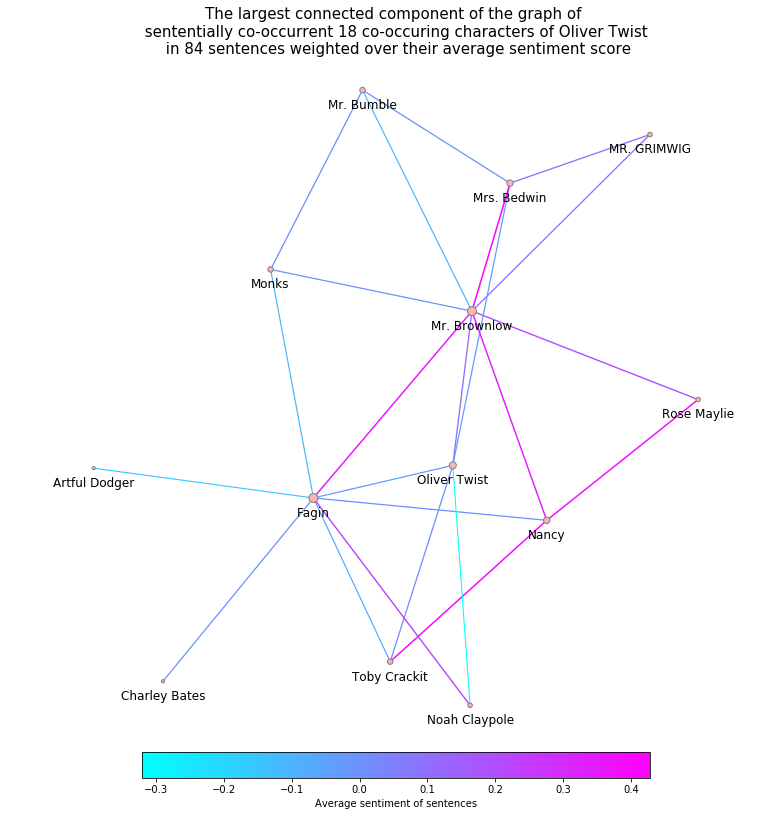

In [22]:
figsize=(13,15)

cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gwlcc.edges(data=True) ]

edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list

pos=graphviz_layout(Gwlcc) 
node_color="#ffb3b3"
node_border_color="grey"
# edge_color="#668cff"

d = Gwlcc.degree()
node_size=[10*v[1] for v in list(nx.degree(Gwlcc))]

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gwlcc, pos,node_color=node_color,node_size=node_size)
nodes.set_edgecolor(node_border_color)
# nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width,a=1)
nx.draw_networkx_edges(Gwlcc, pos,width=width_list,edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=1)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -5   # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gwlcc, yoffset,font_size=12);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The largest connected component of the graph of \n sententially co-occurrent %i co-occuring characters of %s \n in %i sentences weighted over their average sentiment score" %(NN,titlename,SS) 
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.05) 

In [16]:
x = dict(nx.degree(Gwlcc))
sorted_x = sorted(x.items(), key = lambda kv: kv[1], reverse=True)
# ftop_nodes= []
# threshold = 100 # Threshold for ftop_nodes degree > 700
for k,v in sorted_x:
    print k,v
#     if v>threshold:
#         ftop_nodes.append(k)

Mr. Brownlow 8
Fagin 8
Mr. Bumble 7
Oliver Twist 6
Nancy 5
Mrs. Bedwin 4
Monks 3
Mrs. Sowerberry 3
Toby Crackit 3
Noah Claypole 3
MR. GRIMWIG 2
Rose Maylie 2
Mr. Sowerberry 2
Mrs. Corney 2
Mrs. Mann 1
Artful Dodger 1
Bill Sikes 1
Charley Bates 1


<span style="color:blue"><b>From the above list, select an ego with degree less than 50:

In [17]:
ego=["Mr. Brownlow","Fagin"]
alters=[]
for i in list(Gwlcc.neighbors(ego[0])):
    if i not in alters:
        alters.append(i)
for i in list(Gwlcc.neighbors(ego[1])):
    if i not in alters:
        alters.append(i)
for i in ego:
    if i not in alters:
        alters.append(i)
egoNet=Gwlcc.subgraph(alters)
print len(egoNet.nodes()),len(egoNet.edges())

13 23


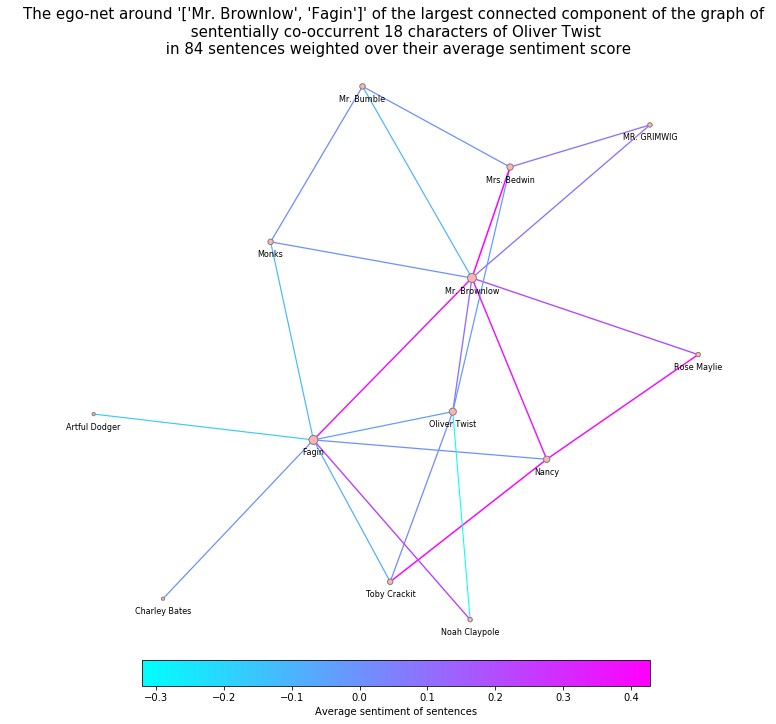

In [20]:
Gwlcc=egoNet

figsize=(13,13)

cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gwlcc.edges(data=True) ]

edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list

pos=graphviz_layout(Gwlcc) 
node_color="#ffb3b3"
node_border_color="grey"
# edge_color="#668cff"

d = Gwlcc.degree()
node_size=[10*v[1] for v in list(nx.degree(Gwlcc))]

plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gwlcc, pos,node_color=node_color,node_size=node_size)
nodes.set_edgecolor(node_border_color)
# nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width,a=1)
nx.draw_networkx_edges(Gwlcc, pos,width=width_list,edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=1)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -5   # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gwlcc, yoffset,font_size=8);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The ego-net around '%s' of the largest connected component of the graph of \n sententially co-occurrent %i characters of %s \n in %i sentences weighted over their average sentiment score" %(ego,NN,titlename,SS) 
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.05) 